# Linear Regression

Linear regression is used to predict quantitave response.

 Y = B0 + B1X

Estimation of coefficient is done using least square.

OLS - refers to procedure of fitting the line to the data.
RSS - cost function which OLS uses to estimate the coefficient.

## Assessing the accuracy of coefficient estimates.
The coefficient we try to estimate should be close to the coefficient of the popultion from where our data in hand or the sample
data is derived. We repeat the process of estimate many a time on different sample and average it which will give us estimates of our coefficient that is close to population coefficient and is unbiased i.e. there is no systematic under or over estimate.

Standard Error (SE)[SD/n^0.5] - tells us how far the single estimate is from the population parameter.

The estimate of sigma is known as residual standard error(RSE)
RSE = [RSS/(n-2)]^0.5

standard error are used to compute the confidence interval.

The null hypothesis for coefficient 

H0 : There is no no relationship between X and Y.
H1(alternate hypothesis) : There is some relationship between X and Y.

Mathematically 

Ho : B1' = 0        [B1'is the estimated coefficient]
H1 : B1' != 0

We calculate SE(B1') to perform this hypothesis test.

t = B1'-0/SE(B1')  [t-statistics]

probability of observing any value equal to [t] is called p-value

p-value -> It is unlikely to observe such an substantial association between predictor and response due to chance. Hence small p-value tells us about the presence of association between predictors and response variable.

## Assessing the acuuracy of the model.

Linear model's accuracy are decribed by two parameters.

1. RSE -> measue of the lack of fit. 
2. R^2[0-1] -> proportion of variance explained. {1-RSS/TSS}  where TSS = [y-mean(y)]^0.5.
R-square is the variability in Y that can be explained using X.

### RSE is used to calculate confidence interval and p-value

## Multiple Linear Regression.

same steps for parameter estimates using RSS.
The estimates for multiple regression are done using Matrix Algebra.

For mutiple regression we calculate F-statistics similar to t-statistics for simple linear model to perform null hypothesis
F [1,>1]= [(TSS-RSS)/p]/RSS/(n-p-1)  where p is the number of predictors and n is the number of observation

Large F-statistics suggest that atleast one of the predictor is associated to response.

F-statisics combined with p-value is used to decide the important predictors.

For model accuracy we use the same metrices of R^2 and RSE.

Prediction interval are wider than confidence interval because both the error in the estimates of 'f' and the irreducible error.


## Extension of the Linear Model.

To overcome the two restrictive assumption of linear model i.e. 
1. linear relation between x and y i.e. a change in y due to unit change in x is constant.
2. additive effect - the effect of change in one predictor is independent of the values of other predictor.

The additive assumption can be handled by introducing interaction term in our model.

Sometimes the interaction term has a very small p-value but the associated variable do not. Therefore we should follow the hierarchical principle which states that we if we include the interaction term in our model we should also include the main effects even if their coefficient is not significant.

## Potential problems associated with Linear Regression. 

1. Non Linearity of the response-predictor relationships. solution -> add polynomial terms.

2. Correlation of error terms.-> i.e a +ve sign for e1 provides no info about sign of e2. (Generally occurs in Time Series model). solution -> the order of difference(substraction) to remove the correlation among observation in same variable. 

3. Non-constant variance of error terms. aka hetroscedasticity -> funnel shape in residual plot. solution -> Transform Y 

4. Outliers. plot 'studentized residual > 3' is an outlier.

5. High-leverage points. refers to unusual value of X

6. Collinearity. when two or more predicted variables are closely related to each other. -> reduces the accuracy of the estimateds of the regression coefficient. Multicollinearity is an advanced form of collinearity when more than 2 predictors are correlated but there is no evidence of correlation between pair of variables. To assess multicollinearity we calculate 'variance inflation factor'(VIF) which ranges from 1 to >>1 where 1 means complete absence of collinearity. In real life there will be some collinearity present in our data set therefore, as a rule of thumb VIF exceeding 5 or 10 signifies problematic amount of collinearity.

In [141]:
#importing libraries
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [142]:
#reading the Boston datasets
Boston =  pd.read_csv(r'C:\Users\Vikram\Desktop\ISLR\Data\Boston.csv', header='infer', index_col='Unnamed: 0')

In [143]:
Boston.shape

(506, 14)

In [144]:
#defined 'medv' as the 'response' and rest of the variable as predictor 'variables'
Boston_y = Boston['medv']
Boston_x = Boston.loc[:, Boston.columns != 'medv']
# splitting the boston datasets in train and test set in the ratio of 80:20
Boston_y_train = Boston_y[:-106]
Boston_y_test = Boston_y[-106:]
Boston_x_train = Boston_x[:-106]
Boston_x_test = Boston_x[-106:]

In [150]:
# import statsmodels api to output the stats which corresponds to one shown in R but the one provided by R is interpretable hands
# down
import statsmodels.api as sm
from scipy import stats

In [151]:
X2 = sm.add_constant(Boston_x_train)
est = sm.OLS(Boston_y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     96.43
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          5.50e-120
Time:                        18:06:39   Log-Likelihood:                -1140.9
No. Observations:                 400   AIC:                             2314.
Df Residuals:                     384   BIC:                             2378.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4017      5.877      5.343      0.0

In [145]:
# Calling the Linear Regression model from sklearn
regr = linear_model.LinearRegression()

In [146]:
#fitting the linear regression. After fitting we can use regr.predict() to make prediction
regr.fit(Boston_x_train, Boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
regr.coef_

array([-1.91246374e-01,  4.42289967e-02,  5.52207977e-02,  1.71631351e+00,
       -1.49957220e+01,  4.88773025e+00,  2.60921031e-03, -1.29480799e+00,
        4.84787214e-01, -1.54006673e-02, -8.08795026e-01, -1.29230427e-03,
       -5.17953791e-01])

In [148]:
# creating an interaction term lstat*age from Boston data sets and a polynomial term to be included in our model.
Boston_x_train_inter = Boston_x_train
Boston_x_train_inter['lstat*age'] = Boston_x_train.lstat*Boston_x_train.age
Boston_x_train_inter['lstat^2'] = Boston_x_train.lstat ** 2

C:\Users\Vikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [149]:
#linear regression with interaction term and polynomial term.
regr1 = linear_model.LinearRegression()
regr1.fit(Boston_x_train_inter, Boston_y_train)
regr1.coef_

array([-1.95470886e-01,  3.89984238e-02,  7.12115445e-02,  1.76460337e+00,
       -1.21707755e+01,  3.98450477e+00,  9.57583793e-02, -1.02986840e+00,
        3.72033194e-01, -1.36343394e-02, -6.08296452e-01, -2.92480943e-03,
       -1.42917448e+00, -6.84931125e-03,  4.31384811e-02])

In [152]:
# First list shows the F-statistics and second list shows the p-values
import sklearn
sklearn.feature_selection.f_regression(Boston_x_train,Boston_y_train, center=True)

(array([ 30.19429528,  41.95648758,  64.69300316,   7.8264956 ,
         40.33851545, 520.79196053,  33.37508875,   4.89383027,
         15.51238946,  42.65989484,  93.12542915,   8.70172589,
        384.58918607, 236.74757454, 198.64791062]),
 array([6.99015329e-08, 2.75723642e-10, 1.01377076e-14, 5.39862043e-03,
        5.83796609e-10, 2.63443560e-74, 1.53430473e-08, 2.75200243e-02,
        9.67714142e-05, 1.99203565e-10, 6.13344246e-20, 3.36684557e-03,
        2.08149008e-60, 2.97303007e-42, 7.03426212e-37]))

In [153]:
# Running my trained model on test set
Boston_y_pred = regr.predict(Boston_x_test)

In [155]:
# getting the MSE and variance R-squared. We can see that R-square is negative that's because our model is doing terrible.
print("Mean squared error: %.2f"
      % mean_squared_error(Boston_y_test, Boston_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Boston_y_test, Boston_y_pred))

Mean squared error: 37.89
Variance score: -0.34


In [158]:
# adding interaction term in my test set so that we can run our fit model on our test data sets
Boston_x_test_inter = Boston_x_test
Boston_x_test_inter['lstat*age'] = Boston_x_test.lstat*Boston_x_test.age
Boston_x_test_inter['lstat^2'] = Boston_x_test.lstat ** 2

C:\Users\Vikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Vikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [160]:
# Running my trained model on test set
Boston_y_pred_intr = regr1.predict(Boston_x_test_inter)

In [162]:
# getting the MSE and variance R-squared. The metrices are way better than the one fiven by data above.We can see that R-square
# is not that great that's because we have unecessary variables in our model which are not significant and also we have not taken
# care of collinearity. 
print("Mean squared error: %.2f"
      % mean_squared_error(Boston_y_test, Boston_y_pred_intr))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Boston_y_test, Boston_y_pred_intr))

Mean squared error: 24.22
Variance score: 0.14


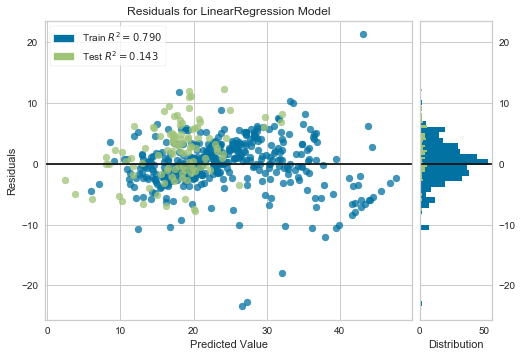

In [166]:
#Library which plots the residual.
import yellowbrick
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regr)
visualizer.fit(Boston_x_train, Boston_y_train)  # Fit the training data to the model
visualizer.score(Boston_x_test, Boston_y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

### The above is the step illustrates fitting Linear Regression. But as evident sklearn does not provide library to do statistical analysis as present in R. Therefore studying the impact of variables on response, test of linearity, correlation among error terms and shape of function can be done a lot easier in R.

## R is statistician tool and is rightly so. 